In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [121]:
diabetis=pd.read_csv(r"C:\Users\medam\Downloads\diabetes.csv")

In [122]:
diabetis.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
diabetis.shape

(768, 9)

In [124]:
diabetis.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Dataset description.

Pregnencies              - Number of times the patient has been pregnant.

Glucose                  - Plasma glucose concentration after 2 hours in an oral glucose tolerance test.

BloodPressure            - Diastolic blood pressure (mm Hg).

SkinThickness            - Thickness of the triceps skinfold, measured in millimeters.

Insulin                  - 2-hour serum insulin (mu U/mL).

BMI                      - Body Mass Index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction - A function that scores the likelihood of diabetes based on family history.

Age                      - Age of the patient.

Outcome                  - Class variable indicating whether the patient has diabetes.

In [125]:
diabetis.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
diabetis.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [127]:
correlation=diabetis.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

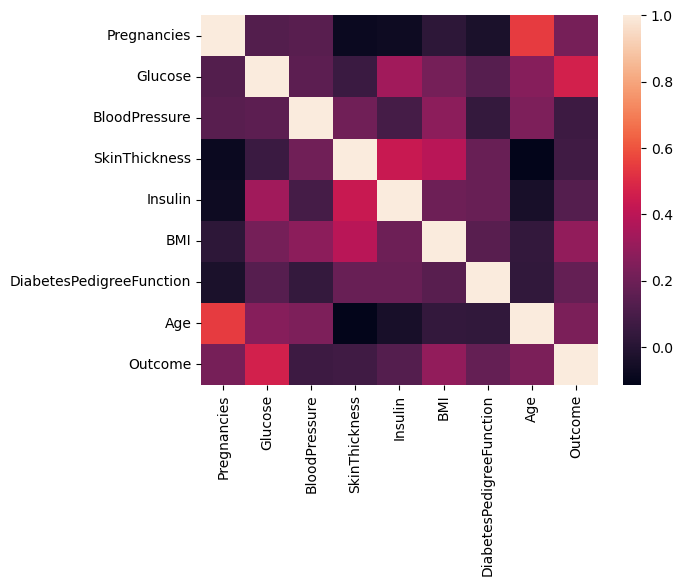

In [128]:
sns.heatmap(diabetis.corr())

In [129]:
diabetis.drop(columns="BloodPressure",inplace=True)

Text(0.5, 1.0, 'Count of Diabetes Outcomes')

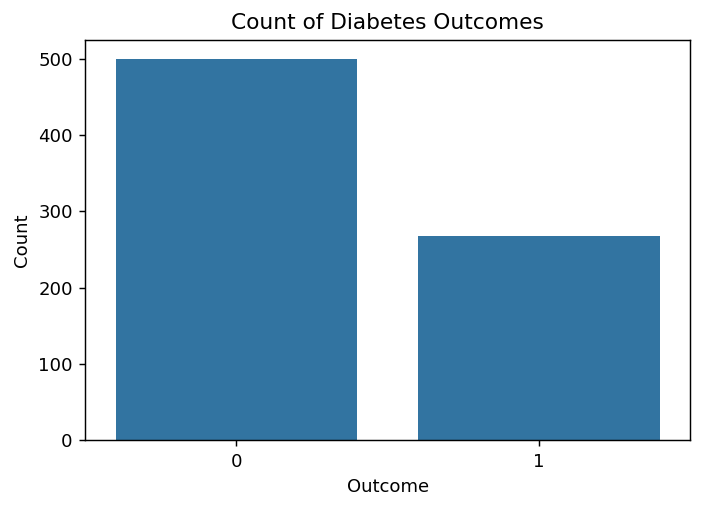

In [130]:
plt.figure(figsize=(6,4),dpi=130)
sns.countplot(x='Outcome', data=diabetis)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Diabetes Outcomes')

<Figure size 780x520 with 0 Axes>

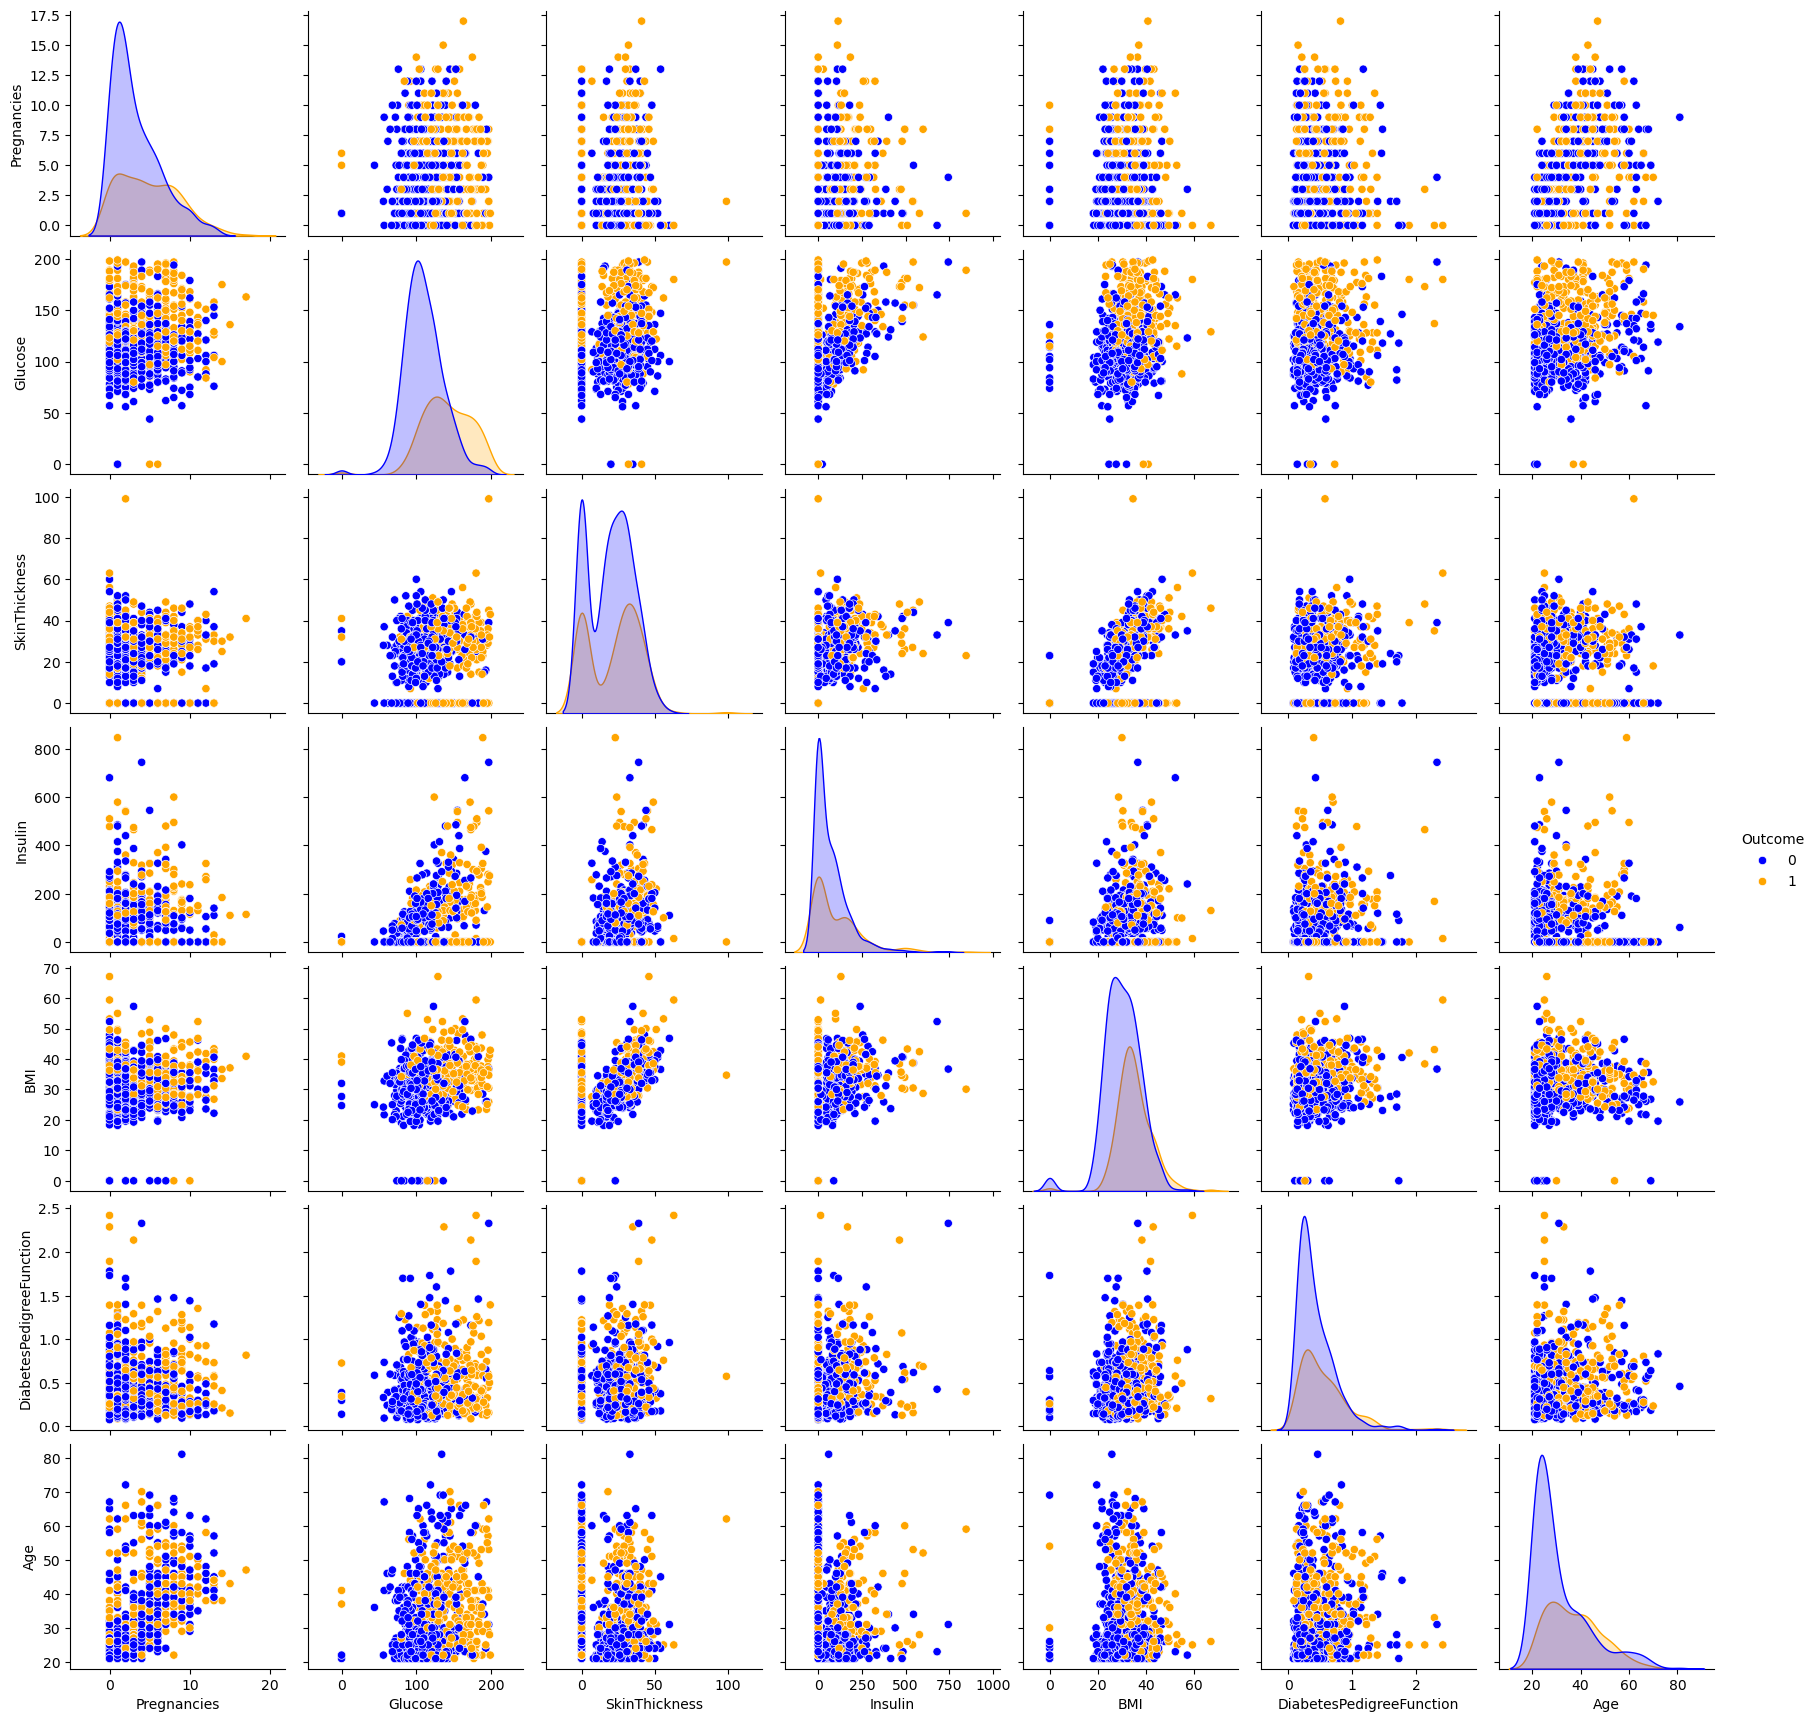

In [131]:
plt.figure(figsize=(6,4),dpi=130)
sns.pairplot(data=diabetis,hue="Outcome",palette={0:"blue",1:"orange"})

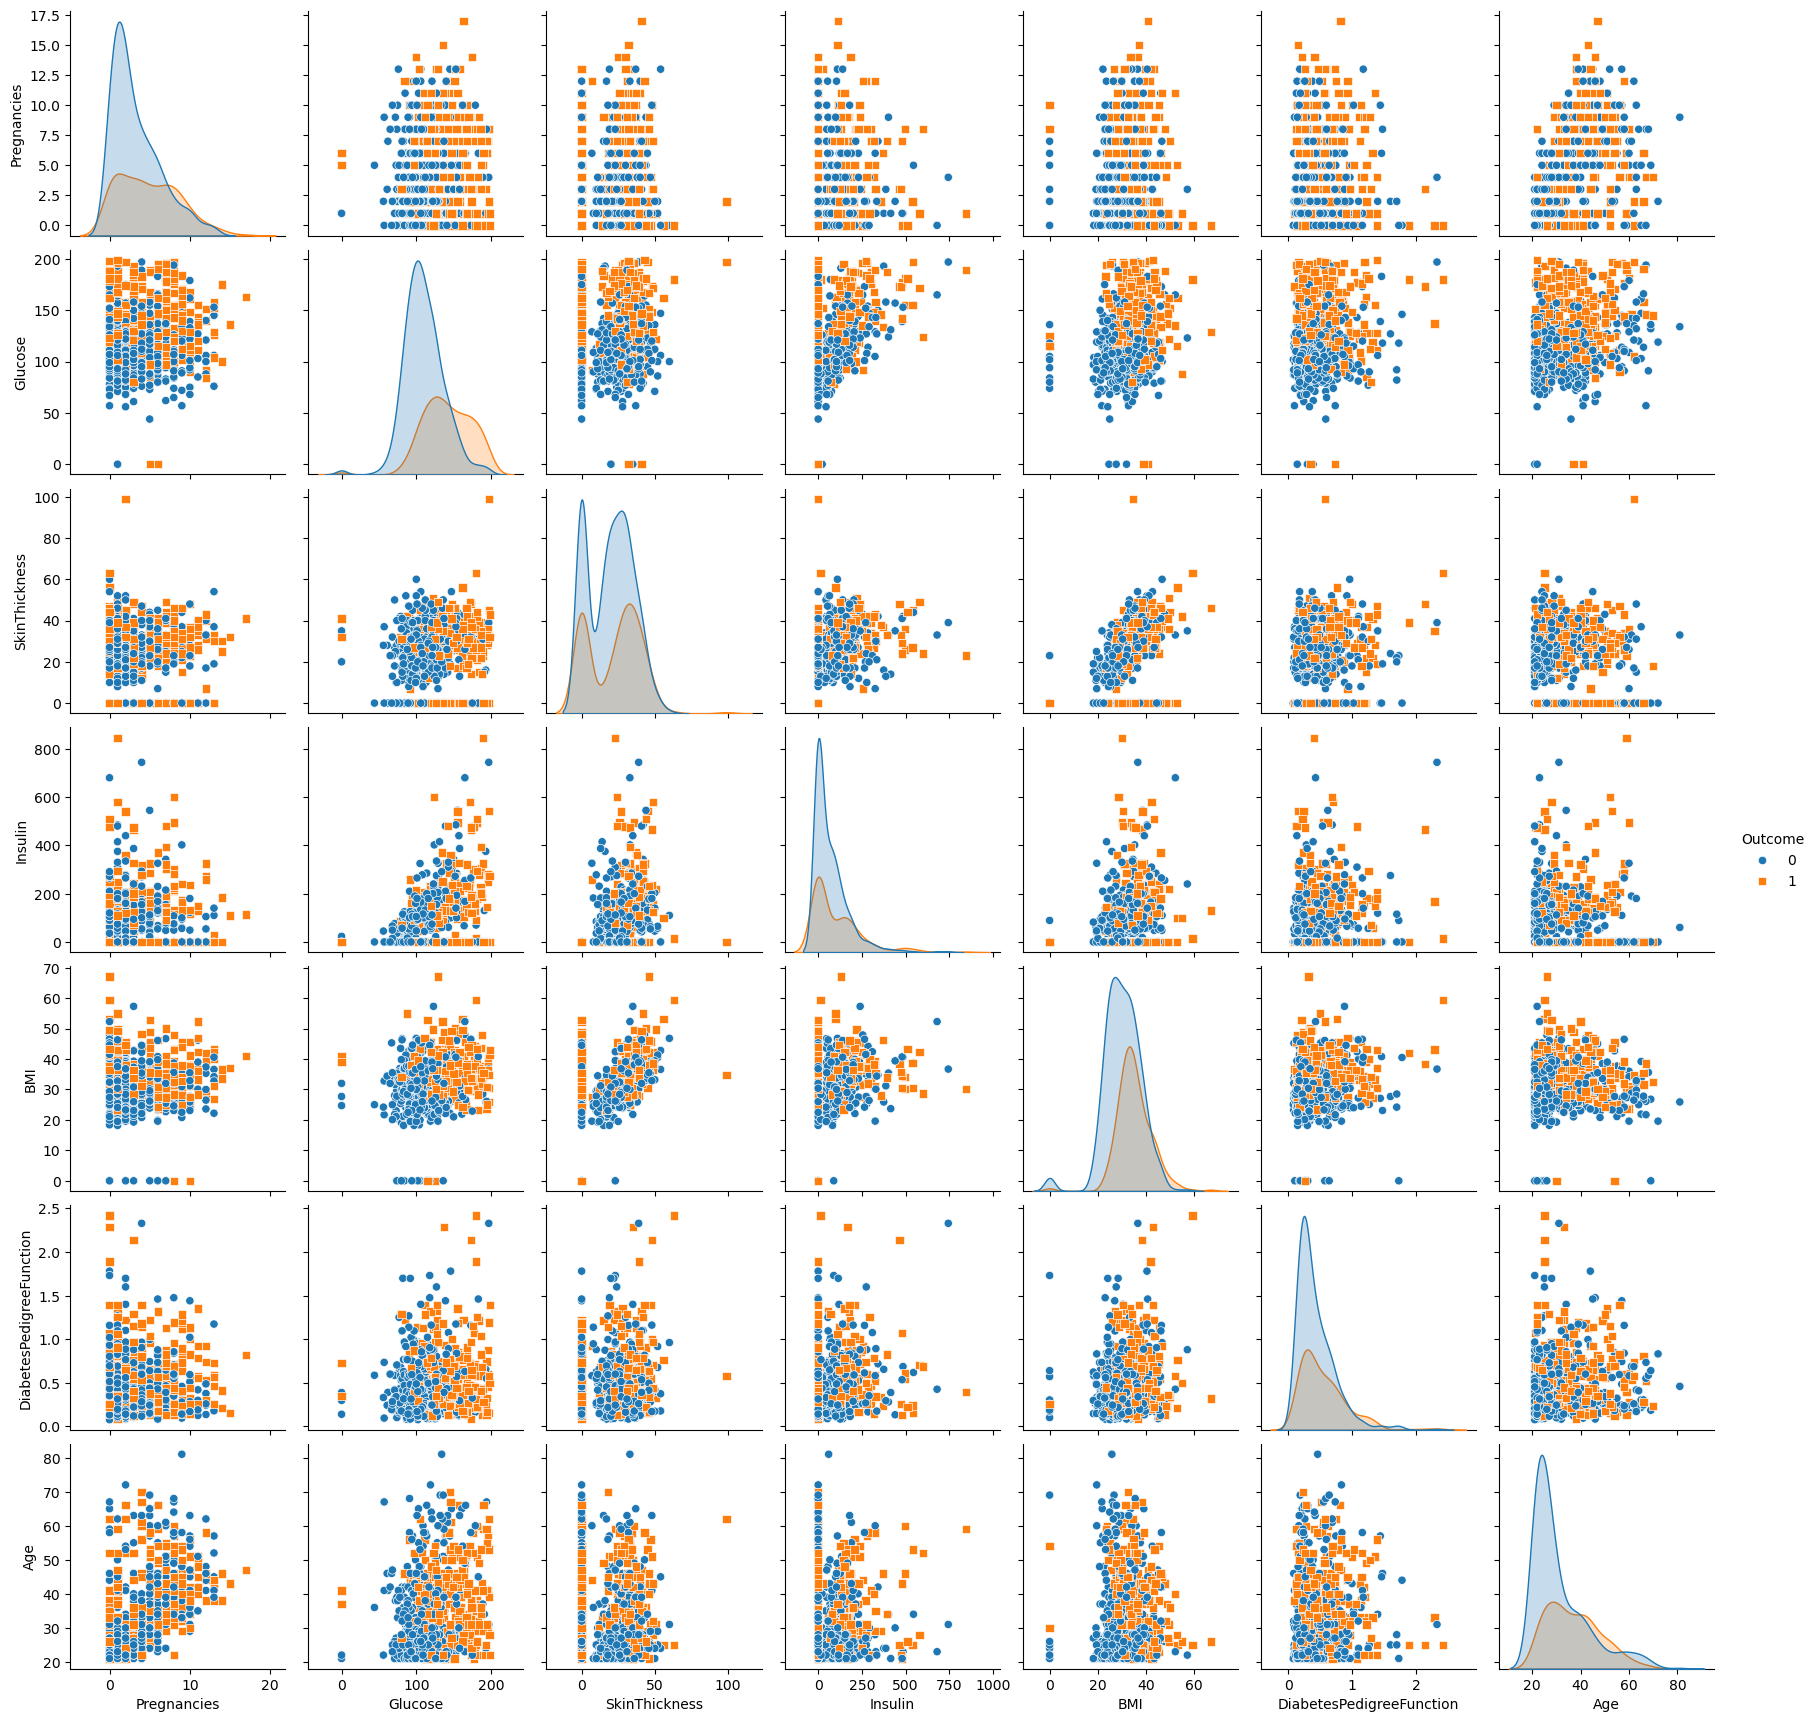

In [132]:
sns.pairplot(diabetis, hue='Outcome', markers=["o", "s"], diag_kind="kde")

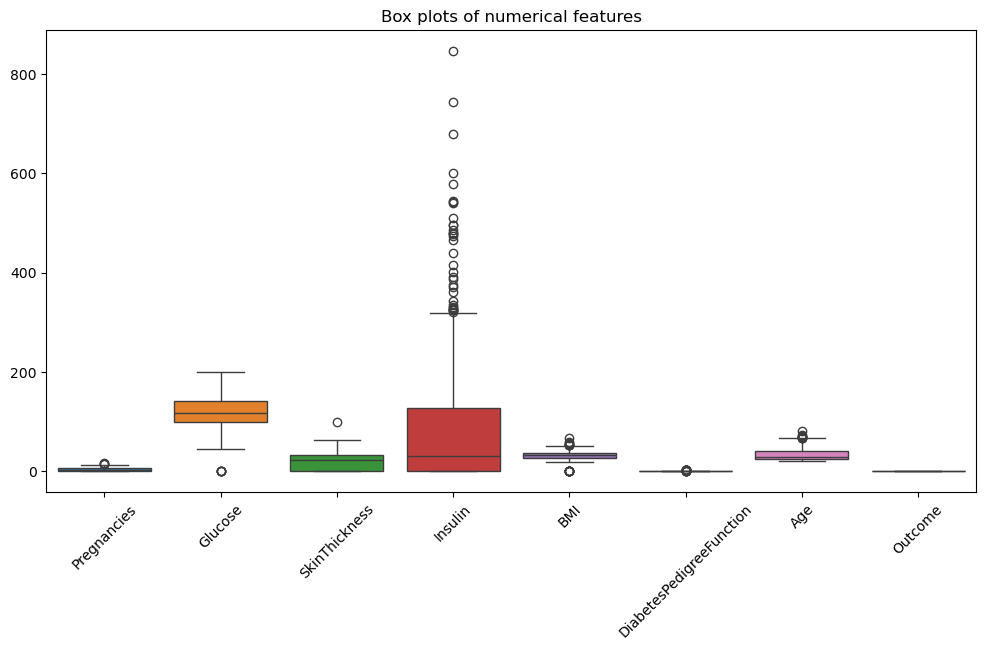

In [133]:
# Identification of outliers.

# Select numerical features
numerical_features = diabetis.select_dtypes(include=["int64", "float64"])

# Plot box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features)
plt.title('Box plots of numerical features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

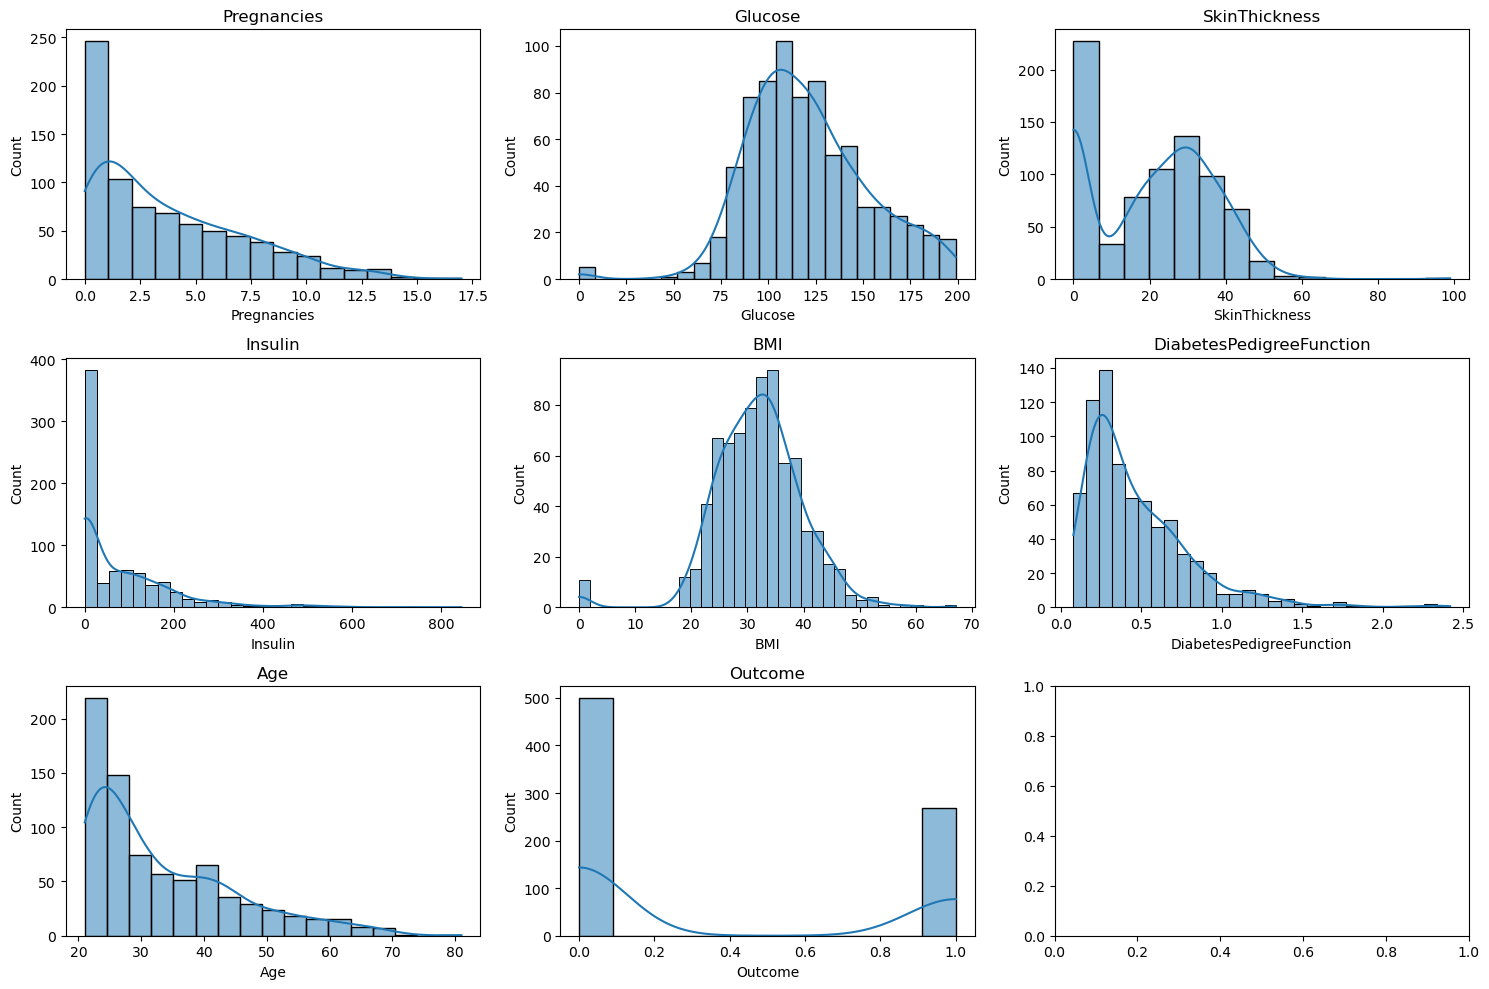

In [134]:

# Number of variables
num_vars = len(diabetis.columns)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each variable
for i, col in enumerate(diabetis.columns):
    sns.histplot(diabetis[col], ax=axes[i],kde=True)
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


In [136]:
X=diabetis.drop("Outcome",axis=1)
y=diabetis["Outcome"]

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [95]:
models={
       "logistic regression":LogisticRegression(),
       "knn":KNeighborsClassifier(),
       "decision tree":DecisionTreeClassifier(),
       "svm":SVC()
}
for name,md in models.items():
    md.fit(x_train_scaled,y_train)
    y_pred=md.predict(x_test_scaled)
    #print(mean_absolute_error(y_test,y_pred))
    #print(r2_score(y_test,y_pred))
    print(f"{name}:accuracy:{accuracy_score(y_test,y_pred)} precision:{precision_score(y_test,y_pred)}")

logistic regression:accuracy:0.7922077922077922 precision:0.8055555555555556
knn:accuracy:0.6948051948051948 precision:0.5714285714285714
decision tree:accuracy:0.6883116883116883 precision:0.5625
svm:accuracy:0.7597402597402597 precision:0.7073170731707317


In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
logistic_model = LogisticRegression(random_state=43)
svm_model = SVC(kernel='rbf', random_state=43)  # SVM with RBF kernel
# Training the models
logistic_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Making predictions on training data
y_train_pred_logistic = logistic_model.predict(X_train_scaled)
y_train_pred_svm = svm_model.predict(X_train_scaled)

# Making predictions on testing data
y_test_pred_logistic = logistic_model.predict(X_test_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

In [117]:
# Calculate accuracy for Logistic Regression
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

# Calculate accuracy for SVM
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Print the accuracies
print(f'Logistic Regression - Train Accuracy: {train_accuracy_logistic:.4f}')
print(f'Logistic Regression - Test Accuracy: {test_accuracy_logistic:.4f}')
print(f'SVM - Train Accuracy: {train_accuracy_svm:.4f}')
print(f'SVM - Test Accuracy: {test_accuracy_svm:.4f}')

Logistic Regression - Train Accuracy: 0.7866
Logistic Regression - Test Accuracy: 0.7792
SVM - Train Accuracy: 0.8371
SVM - Test Accuracy: 0.7403


In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']  # Non-linear kernel
}
grid_search = GridSearchCV(SVC(random_state=43), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_svm_model = grid_search.best_estimator_

# Make predictions with SVM
y_train_pred_svm = best_svm_model.predict(X_train_scaled)
y_test_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Print the accuracies
print(f'SVM (Best Parameters) - Train Accuracy: {train_accuracy_svm:.4f}')
print(f'SVM (Best Parameters) - Test Accuracy: {test_accuracy_svm:.4f}')
print(f'Best SVM Parameters: {grid_search.best_params_}')


SVM (Best Parameters) - Train Accuracy: 0.7932
SVM (Best Parameters) - Test Accuracy: 0.7727
Best SVM Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
logistic_model = LogisticRegression(random_state=43)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions with Logistic Regression
y_train_pred_logistic = logistic_model.predict(X_train_scaled)
y_test_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

# Print the accuracies
print(f'Logistic Regression - Train Accuracy: {train_accuracy_logistic:.4f}')
print(f'Logistic Regression - Test Accuracy: {test_accuracy_logistic:.4f}')


Logistic Regression - Train Accuracy: 0.7899
Logistic Regression - Test Accuracy: 0.7857


In [140]:
import joblib

# Save the model
model_filename = 'logistic_regression_model.pkl'
joblib.dump(logistic_model, model_filename)


['logistic_regression_model.pkl']

In [141]:
# Load the model
loaded_model = joblib.load(model_filename)

# Use the loaded model to make predictions
y_test_pred_loaded = loaded_model.predict(X_test_scaled)
loaded_model_accuracy = accuracy_score(y_test, y_test_pred_loaded)
print(f'Loaded Model - Test Accuracy: {loaded_model_accuracy:.4f}')


Loaded Model - Test Accuracy: 0.7857


In [142]:
import joblib

# Save the scaler
scaler_filename = 'logistic_scaler.pkl'
joblib.dump(scaler, scaler_filename)



['logistic_scaler.pkl']